## Evolutionary Game Theory

Deo (2015) implemented the Evolutionary Game Theory (EGT) framework to model the diachronic path of the progressive to imperfective aspectual shift. In a nutshell, EGT models strategy selection and extension across populations, either consciously or subconsciously. Lund (2021) implemented this framework in Python.


As Deo discusses, there are two aspects of the grammaticalization question that are best studied through EGT: the typological aspect and the cross-temporal aspect. In this current research, I will study the diachronic shift demonstratives to definite articles, which has at least three states of being-- exophoric demonstrative, adnominal demonstrative, definite article. The path is cylic (van Gelderen, 2010) where the same populations may have different strateges in different iterations of the same cycle. 

### $\delta$-function 

This function defines communicative success. For a speaker strategy _S_, a hearer strategy _H_, and a state _t_, the success of _S_ conveying to to _H_ is defined as $\delta$.
\
\
$\delta_t = 
\begin{cases}\
1 & \text{if}\quad H(S(t)) = t\\\\
0 & \text{otherwise}
\end{cases}$




Speaker utility:

_k_ is cost, _n_ is a dunction to return _j_-1 where _j_ is the number of expressions used by _S_ to convey the full range of meanings for an element:



$U_s (S, H, t) = \delta_t(S, H) - k \times n(S)$

Hearer utility:
\
\
$U_h (S, H, t) = \delta_t(S, H)$

The average speaker and hearer utilities across states are given as:

$U_h(S, H)=\sum_t P(t) \times (\delta_t(S, H))$

The model must be enriched through contexts, which in our case the contexts of: \
$ C_{exo}$ when $P(exo) = 0.9$ and $P(ana) = 0.1$ and \
$ C_{ana}$ when $P(exo) = 0.1$ and $P(ana) = 0.9$. 


For speaker strategies in states $exophoric$ and $anaphoric$ there are the following strategies:

|           |   $C_{e}$ |     	    |   $C_{a}$ |      	|
|---------	|---------|---------|------	 |-------|
|       	| EXO    	|  ANA 	    |   EXO     | ANA	|
| $S_{cd}$  | dist      | pro 	    | pro    	| pro 	|
| $S_{pcd}$ | dist      | dist 	    | pro     	| pro 	|
| $S_{em}$  | dist      | dist 	    | dist     	| pro 	|
| $S_{cd2}$ | dist      | dist 	    | dist     	| dist 	|

For speaker strategies given a context and utterance:

|         	| $C_{e}$: dist |   $C_{e}$: pro    	| $C_{a}$: dist	| $C_{e}$: pro     	|
|---------	|---------	|------	|----------	|------	|
| $H_{cd}$  	| exo    	| exo 	| ana     	| ana 	|
| $H_{pcd}$ 	| exo   	| exo	| exo     	| ana 	|
| $H_{em}$  	| exo    	| ana 	| exo     	| ana 	|

The utility function is as follows:

$U_h(S, H) = \sum cP(c) \times \sum_t P_c(t) \times (\delta_t(S,H))$

### Expected Utility (EU)

For a symmetrized game:

What happen when an individual with one grammar meets an individual with a different grammar:


$EU(\langle S,H\rangle, \langle S',H'\rangle) = \frac{1}{2} \times (U_s(S,H') + U_h(S',H))$

In [1]:
# import the necessary dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set the states, contexts, and speaker and hearer properties

states = ['exo', 'ana']

contexts = {'Cexo':
               {'exo': 0.9,
               'ana': 0.1},
           'Cana':
               {'exo': 0.4,
               'ana': 0.6}}

speaker = {'Scd': {'Cexo': {'exo': 'dist', 'ana': 'pro'},
                  'Cana': {'exo': 'pro', 'ana': 'pro'}},
          'Spcd': {'Cexo': {'exo': 'dist', 'ana': 'dist'},
                  'Cana': {'exo': 'pro', 'ana': 'pro'}},
          'Sem': {'Cexo': {'exo': 'dist', 'ana': 'dist'},
                  'Cana': {'exo': 'dist', 'ana': 'pro'}},
          'Scd2': {'Cexo': {'exo': 'dist', 'ana': 'dist'},
                  'Cana': {'exo': 'dist', 'ana': 'dist'}}}

hearer = {'Hcd': {'Cexo': {'dist': 'exo', 'pro': 'exo'},
                  'Cana': {'dist': 'ana', 'pro': 'ana'}},
          'Hpcd': {'Cexo': {'dist': 'exo', 'pro': 'exo'},
                  'Cana': {'dist': 'exo', 'pro': 'ana'}},
          'Hem': {'Cexo': {'dist': 'exo', 'pro': 'ana'},
                  'Cana': {'dist': 'exo', 'pro': 'ana'}}}

k = 0.01

In [3]:
class AverageUtility:
    def __init__(self, states, contexts, speaker, hearer, k):
        self.states = states
        self.contexts = contexts
        self.speaker = speaker
        self.hearer = hearer
        self.k = k
    
    def delta(self, S, H, t):
        if H[S[t]] == t:
            return 1
        else:
            return 0
        
    def n(self, S):
        return len(set(S.values()))-1
        
    def U_s(self, S, H):
        a = 0
        for c in self.contexts:
            s = 0
            for t in self.states:
                s += self.contexts[c][t] * self.delta(self.speaker[S][c], self.hearer[H][c], t) \
                        - (self.k * self.n(self.speaker[S][c]))
            a += s * 0.5
        return a
    
    def U_h(self, S, H):
        a = 0
        for c in self.contexts:
            s = 0
            for t in self.states:
                s += self.contexts[c][t] * self.delta(self.speaker[S][c], self.hearer[H][c], t)
            a += s * 0.5
        return a
    
    def EU(self, S1, H1, S2, H2):
        return 0.5 * (self.U_s(S1, H2) + self.U_h(S2, H1))
    
    def EU_matrix(self):
        strat_prod = list(((x, y) for x in self.speaker.keys() for y in self.hearer.keys()))
        index = [', '.join(strat) for strat in strat_prod]
        matrix = pd.DataFrame(np.zeros((len(index), len(index))),
                              index=index, 
                              columns=index)
        for strat1 in strat_prod:
            for strat2 in strat_prod:
                matrix.loc[', '.join(strat1), ', '.join(strat2)] = self.EU(strat1[0], strat1[1], strat2[0], strat2[1])
        return matrix

In [4]:
# find the average utility of each strategy
average_utility = AverageUtility(states, contexts, speaker, hearer, k)
average_utility.EU_matrix()

,"Scd, Hcd","Scd, Hpcd","Scd, Hem","Spcd, Hcd","Spcd, Hpcd","Spcd, Hem","Sem, Hcd","Sem, Hpcd","Sem, Hem","Scd2, Hcd","Scd2, Hpcd","Scd2, Hem"
"Scd, Hcd",0.745,0.745,0.770,0.745,0.745,0.770,0.745,0.745,0.770,0.745,0.745,0.770
"Scd, Hpcd",0.745,0.745,0.770,0.745,0.745,0.770,0.845,0.845,0.870,0.695,0.695,0.720
"Scd, Hem",0.770,0.770,0.795,0.745,0.745,0.770,0.845,0.845,0.870,0.695,0.695,0.720
"Spcd, Hcd",0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750
"Spcd, Hpcd",0.750,0.750,0.750,0.750,0.750,0.750,0.850,0.850,0.850,0.700,0.700,0.700
"Spcd, Hem",0.775,0.775,0.775,0.750,0.750,0.750,0.850,0.850,0.850,0.700,0.700,0.700
"Sem, Hcd",0.745,0.845,0.845,0.745,0.845,0.845,0.745,0.845,0.845,0.745,0.845,0.845
"Sem, Hpcd",0.745,0.845,0.845,0.745,0.845,0.845,0.845,0.945,0.945,0.695,0.795,0.795
"Sem, Hem",0.770,0.870,0.870,0.745,0.845,0.845,0.845,0.945,0.945,0.695,0.795,0.795
"Scd2, Hcd",0.750,0.700,0.700,0.750,0.700,0.700,0.750,0.700,0.700,0.750,0.700,0.700


## The replicator-mutator dynamics

#### The replicator

This forms a matrix with the size $|S| \times |S|$ such that $|S|$ is the number of strategies. \
The frequency of strategies in a population is a vector $F$ of length $|S|$ where $F_i$ is the frequency of strategy $S_i$ in the population. \
The average payoffs, or fitness, of a strategy $S_i$ for a given population is the dot product of the row vector $X_i$ and $F$. This is called $\vec f$. \
The average fitness of a population $\phi$ at a time is given as $\vec f \cdot F$, or the dot prouct of the average payoff for the individual strategies and their frequencies. \
The frequency of a strategy $A$ is defined as:



$ x'A = x_A \frac{f_A}{\phi}$

### The mutator

To account for language shift over time we need a mutator. This can be represented as a row-stoachstic matrix $Q$, which is the probability that a mutation occurs from one strategy to the next. The probability that one strategy $j$ mutates into a strategy $i$ is written as $Q_{ji}$

Deo's mutator equation is as such:

$x'i = \sum_{j=1}^n Q_{ji} \frac{x_jf_j}{phi}$

This an also be written using dot products, where the new frequences are $F'$ and the operations in the fraction are element-wise:

$F' = Q^T \cdot \frac{F \vec f}{\phi}$

In [5]:
class ReplicatorMutatorDynamics:
    def __init__(self, payoffs, frequencies, Q):
        self.payoffs = payoffs
        self.frequencies = frequencies
        self.Q = Q
    
    def replicator(self, payoffs, frequencies):
        average_payoffs = payoffs.dot(frequencies)
        average_fitness = average_payoffs.dot(frequencies)
        new_population = frequencies * average_payoffs / average_fitness
        return new_population
    
    def replicator_mutator(self, payoffs, frequencies, Q):
        average_payoffs = payoffs.dot(frequencies)
        average_fitness = average_payoffs.dot(frequencies)
        new_population = Q.T.dot(frequencies * average_payoffs) / average_fitness
        return new_population
    
    def run_dynamics(self, iterations):
        iteration = 0
        init_frequencies = self.frequencies
        payoffs = self.payoffs
        Q = self.Q
        frequencies = init_frequencies
        results = pd.DataFrame(index=range(0, iterations+1), columns=payoffs.columns)
        results.iloc[[0]] = np.zeros((1, len(payoffs.columns)))
        for i in range(iteration, iterations+1):
            frequencies = self.replicator_mutator(payoffs, frequencies, Q)
            results.iloc[i, :] = frequencies
        return results

### Initial Replication

Replicates the results first with perfect learners. 

In [6]:
test = ['Scd, Hcd', 'Spcd, Hpcd']

test_mat = average_utility.EU_matrix().loc[test, test]

In [7]:
frequencies = np.array([0.89, 0.11])
Q = np.array([[1, 0],
             [0, 1]])
replicator = ReplicatorMutatorDynamics(test_mat, frequencies, Q)

<AxesSubplot:>

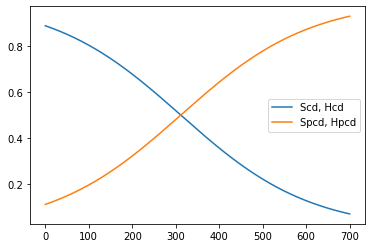

In [8]:
model1 = replicator.run_dynamics(700)
model1.plot()

With imperfect learners:

<AxesSubplot:>

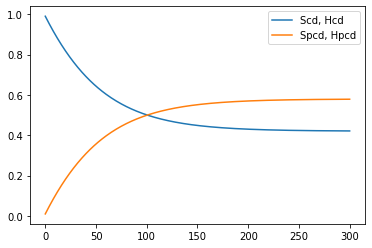

In [9]:
frequencies = np.array([1, 0])
Q = np.array([[0.99, 0.01],
              [0.01, 0.99]])
replicator2 = ReplicatorMutatorDynamics(test_mat, frequencies, Q)
model2 = replicator2.run_dynamics(300)
model2.plot()

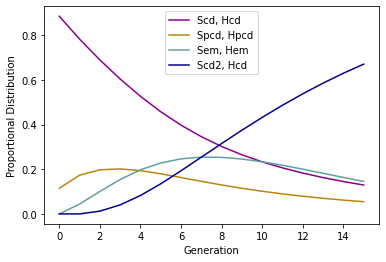

In [26]:
strategies = ['Scd, Hcd', 'Spcd, Hpcd', 'Sem, Hem', 'Scd2, Hcd']
payoff_matrix = average_utility.EU_matrix().loc[strategies, strategies]
frequencies = np.array([1, 0, 0, 0])
Q2 = np.array([[0.885, 0.115, 0, 0],
              [0, 0.619, 0.381, 0],
              [0, 0, 0.734, 0.266],
              [0, 0, 0, 1]])
replicator3 = ReplicatorMutatorDynamics(payoff_matrix, frequencies, Q2)
model3 = replicator3.run_dynamics(15)
model3.plot(color=['darkmagenta','darkgoldenrod','cadetblue','darkblue'])
plt.ylabel('Proportional Distribution')
plt.xlabel('Generation')
plt.savefig('EGTEnglish.png')

The results all depend on the underlying frequencies of the strategies in the population that can change Q in different positions. Cost should play into Q, which factor into the payoff matrix. 

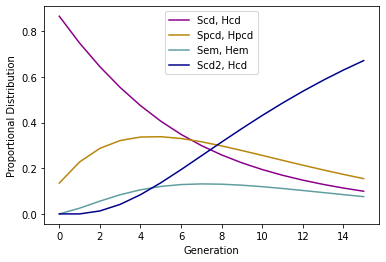

In [34]:

strategies = ['Scd, Hcd', 'Spcd, Hpcd', 'Sem, Hem', 'Scd2, Hcd']
payoff_matrix = average_utility.EU_matrix().loc[strategies, strategies]
frequencies = np.array([1, 0, 0, 0])
Q3 = np.array([[0.865, 0.135, 0, 0],
              [0.0, 0.815, 0.185, 0],
              [0, 0.0, 0.513, 0.488],
              [0, 0, 0, 1]])
replicator3 = ReplicatorMutatorDynamics(payoff_matrix, frequencies, Q3)
model4 = replicator3.run_dynamics(15)
model4.plot(color=['darkmagenta','darkgoldenrod','cadetblue','darkblue'])
plt.ylabel('Proportional Distribution')
plt.xlabel('Generation')
plt.savefig('EGTItalian.png')